## Imbalanced dataset
An imbalanced dataset is one where the classes in a classification problem are not represented equally. In other words, one class (majority class) has significantly more samples than the other class (minority class).

#### Example:
  
1. Balanced Dataset:

  - Class 0: 500 samples

  - Class 1: 500 samples

2. Imbalanced Dataset:

  - Class 0: 950 samples

  - Class 1: 50 samples

#### Problem with Imbalanced Datasets:
Machine learning models may become biased toward the majority class because it dominates the training data.

Metrics like accuracy can be misleading. For instance, if 95% of the data belongs to Class 0, a model predicting "Class 0" for everything will have 95% accuracy but fail to predict the minority class.

#### Why it Matters:
Imbalanced datasets are common in real-world problems like:

1. Fraud detection
2. Medical diagnoses
3. Rare event prediction

## How to deal with imbalanced dataset
To deal with an imbalanced dataset, you can use these strategies:

- Resampling Techniques:

1) Oversampling: Duplicate minority class samples (e.g., SMOTE).
2) Undersampling: Reduce majority class samples.
- Class Weighting:

--Use class_weight='balanced' in models like Logistic Regression, SVM, or Random Forest to give more importance to the minority class.

- Generate Synthetic Data:

--Use techniques like SMOTE or ADASYN to create synthetic samples for the minority class.

- Algorithm Selection:

-- Choose algorithms like Random Forest, Gradient Boosting, or XGBoost, which handle imbalanced data better.
- Evaluation Metrics:

-- Focus on metrics like Precision, Recall, F1-Score, and ROC-AUC instead of accuracy.

In [3]:
import pandas as pd

In [9]:
data = pd.read_csv(r"C:\Users\sharm\Downloads\Datasets\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from collections import Counter  
Counter(data['Outcome'])  # Count occurrences of each value in the 'Outcome' column

Counter({0: 500, 1: 268})

class 0: majority

class 1: minority

## Oversampling
- What it does:
Increases the number of samples in the minority class by duplicating or generating new synthetic samples.

- How:
Duplicate existing minority samples.
Use techniques like SMOTE (Synthetic Minority Oversampling Technique) to create synthetic samples.

- Advantage: No loss of data.

  
- Example: If Class 0 has 100 samples and Class 1 has 10, oversampling creates more samples for Class 1 (e.g., 100 for Class 0, 100 for Class 1).


## Undersampling
- What it does: Reduces the number of samples in the majority class to match the minority class.

- How:
Randomly remove samples from the majority class.

- Advantage: Speeds up training by reducing dataset size.

- Disadvantage: Risk of losing important data.

- Example: If Class 0 has 100 samples and Class 1 has 10, undersampling reduces Class 0 to 10 samples (e.g., 10 for Class 0, 10 for Class 1).

#### Euclidean distance
Euclidean distance helps find "close" neighbors to balance the dataset while preserving the feature relationships.

It plays a key role in oversampling and undersampling, especially when using methods like SMOTE or nearest neighbor-based techniques.

##### In Oversampling (e.g., SMOTE):
- How it's used: SMOTE generates synthetic samples by interpolating between a minority class sample and its nearest neighbors (based on Euclidean distance).
  
- Why: Euclidean distance helps find similar samples in the feature space, ensuring that new synthetic samples are meaningful and within the minority class distribution.

  
##### In Undersampling:
- How it's used: Undersampling often relies on nearest neighbors to identify and remove samples from the majority class that are too far from the decision boundary (using Euclidean distance).
  
- Why: By removing distant or redundant majority samples, the dataset becomes more balanced while retaining meaningful data.

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x = data.drop("Outcome", axis=1)
y = data.Outcome

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=0)
Counter(ytrain)

Counter({0: 370, 1: 206})

## Oversampling Using SMOTE
SMOTE (Synthetic Minority Oversampling Technique) is used to generate synthetic samples for the minority class in an imbalanced dataset.

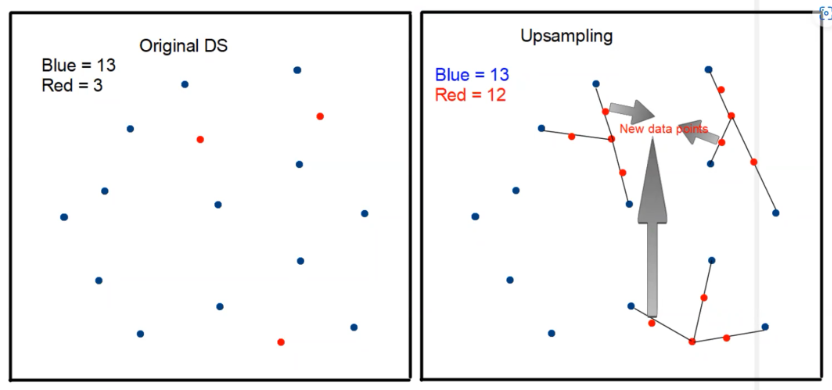

#### When to Use SMOTE
1. Imbalanced Datasets:

When the dataset has significantly fewer samples in the minority class compared to the majority class. Example: Fraud detection, rare disease diagnosis.

2. Avoiding Overfitting:

SMOTE generates synthetic samples instead of simply duplicating existing samples, which helps avoid overfitting to the minority class.

3. When Data Distribution Matters:

SMOTE ensures synthetic samples are created based on the feature space, preserving the characteristics of the minority class.

#### How SMOTE Increases Data
It creates new synthetic samples for the minority class based on the feature space, not duplicates.

- For example:
  
  - Minority class has 50 samples.

  - After SMOTE with a ratio of 1:1, the minority class will increase to match the size of the majority class.

In [34]:
# sm= SMOTE()

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE()

In [38]:
xtrain_ns, ytrain_ns = sm.fit_resample(xtrain,ytrain)

In [40]:
print("The number of classes before fit{}".format(Counter(ytrain)))
print("The number of classes after fit{}".format(Counter(ytrain_ns)))

The number of classes before fitCounter({0: 370, 1: 206})
The number of classes after fitCounter({0: 370, 1: 370})


## Downsampling using nearmiss

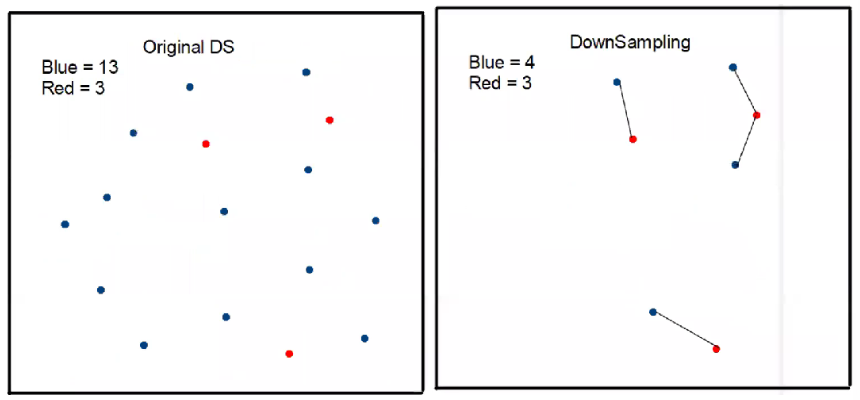

NearMiss is a downsampling technique that reduces the majority class in imbalanced datasets by selecting samples based on their proximity to the minority class using Euclidean distance.

- How it Works:
1. Find Nearest Minority Class Samples: NearMiss identifies the majority class samples that are closest to the minority class.

2. Remove Majority Class Samples: The majority class samples that are farthest from the minority class are removed to balance the dataset.

In [44]:
from imblearn.under_sampling import NearMiss

In [46]:
ds = NearMiss()

In [48]:
xtrain_ns, ytrain_ns = ds.fit_resample(xtrain,ytrain)

In [50]:
print("The number of classes before fit{}".format(Counter(ytrain)))
print("The number of classes after fit{}".format(Counter(ytrain_ns)))

The number of classes before fitCounter({0: 370, 1: 206})
The number of classes after fitCounter({0: 206, 1: 206})


### Techniques to remove Skewness

1. Standardization: Scales data to have a mean of 0 and std deviation of 1. Use when features have different scales (e.g., for SVM, KNN).
2. Normalization: Scales data to a range [0, 1]. Use when features have different ranges (e.g., for neural networks).
3. Log Transformation: Reduces the impact of large values and skews. Use for right-skewed data or data with outliers.
4. Power Transformation: Makes data more normal-distributed. Use when data is non-normal and you want to stabilize variance.
5. Quantile Transformation: Transforms data to follow a uniform or normal distribution. Use to normalize data with outliers.
6. Binning: Converts continuous data into categories. Use to group values or reduce outliers’ effect.
7. Categorical Encoding: Converts categorical data to numeric (e.g., one-hot or label encoding). Use when using algorithms that require numeric input.
8. Winsorization: Limits extreme values. Use when dealing with outliers that affect the model.

### Understanding other data transformation and when you should use this

There are situations you do not want remove outliers and want to keep it because it is real data.

#### Techniques to handle data without removing outliers:

1. Log/Power Transformation: Reduces the impact of large values and skews.
2. Quantile Transformation: Makes data more uniform or normal without removing outliers.
3. Robust Scaling: Scales data using median and IQR, reducing sensitivity to outliers.
4. Winsorization: Limits extreme values to a percentile, without removing them.
5. Ensemble Models: Tree-based models (e.g., Random Forest) are robust to outliers.
6. Resampling (SMOTE, NearMiss): Adjusts class distribution without removing outliers.
7. Robust Models: Use models like Robust Regression that handle outliers directly.

### Log Power Transformation

Log Power Transformation is a technique used to reduce the skewness of data, making it more normally distributed and stabilizing variance. It is especially useful when data contains large positive values or has a right skew.

- Example:
If your data is [100, 1000, 10000], applying a log transformation will reduce the impact of large values and bring them closer together, making it easier to model.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [54]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [58]:
data.shape

(768, 9)

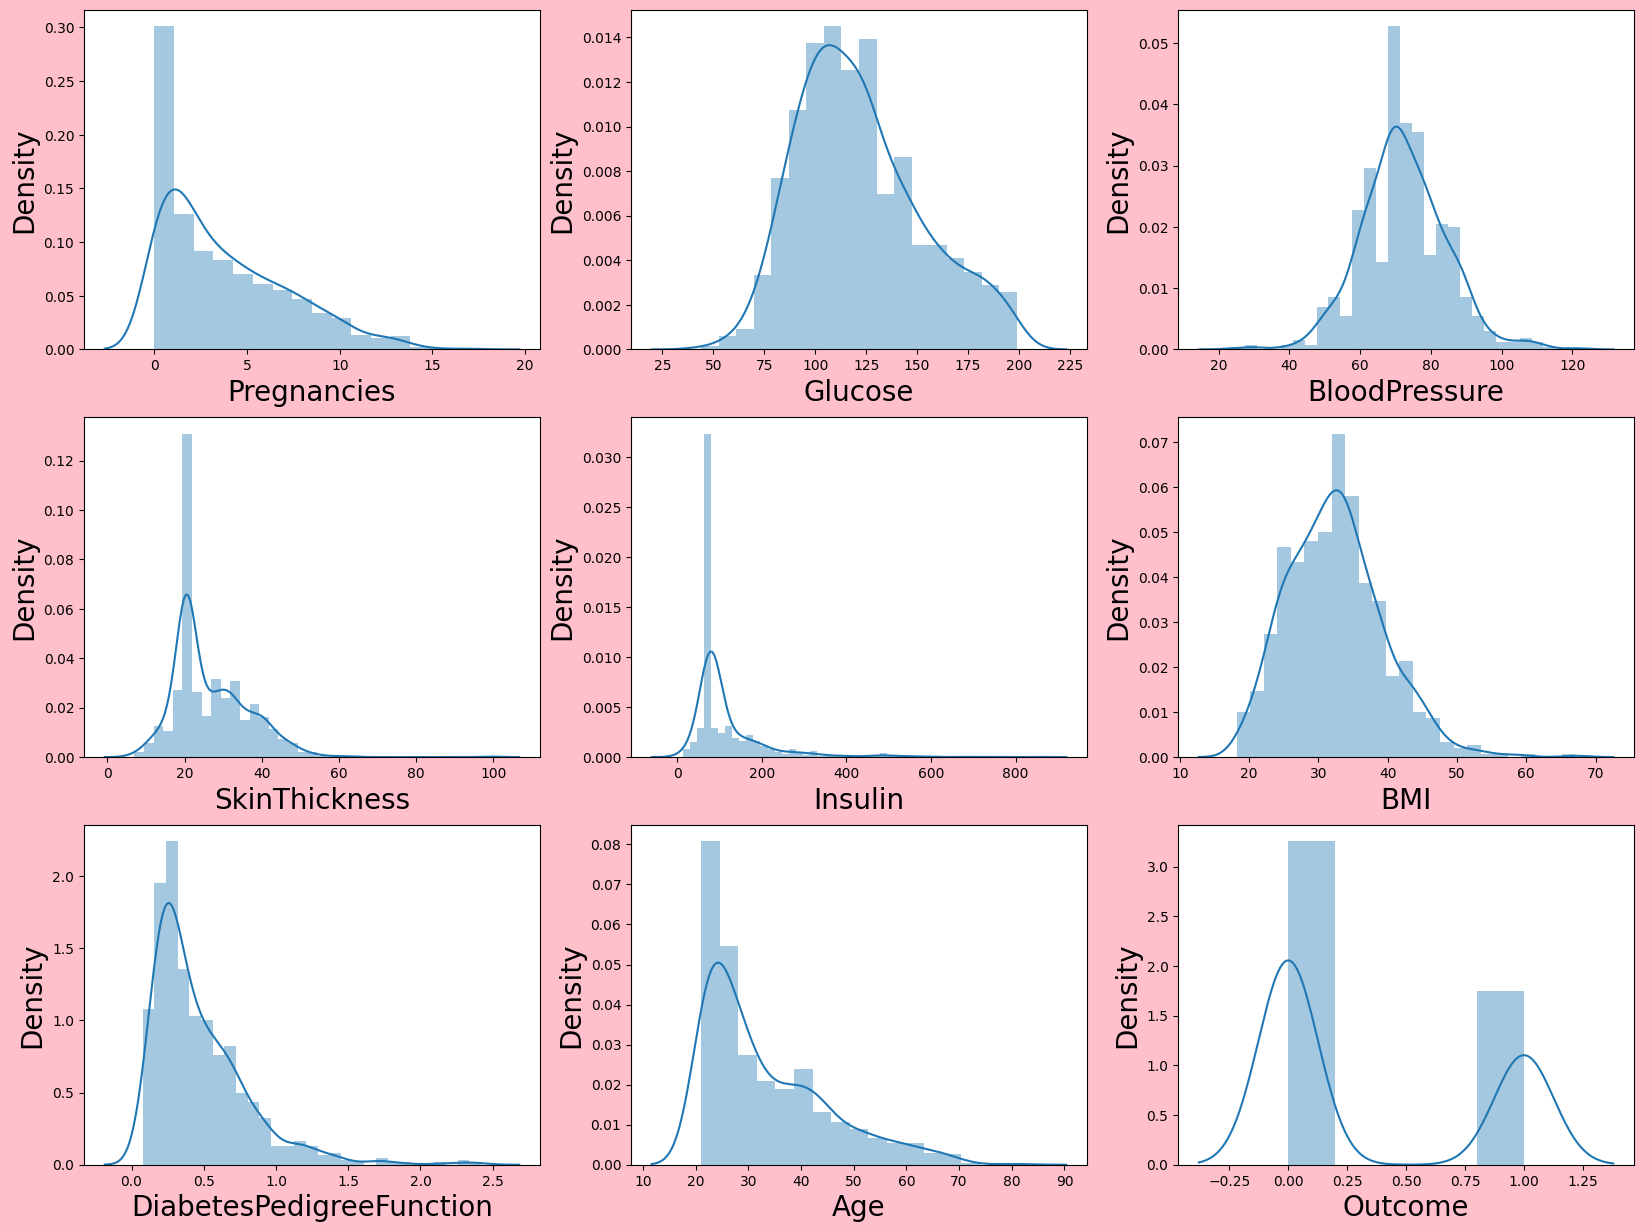

In [64]:
# Lets plot the Dist plot using plt.figure
plt.figure(figsize=(20,15),facecolor='pink') 

plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Density',fontsize=20)
        
    plotnumber +=1
    
plt.show()

In [74]:
# Apply log transformer to reduce skewness in data

data['Insulin'] = np.log(data['Insulin'])
data['BloodPressure']=np.log(data['BloodPressure'])
data['SkinThickness']=np.log(data['SkinThickness'])
data['DiabetesPedigreeFunction']=np.log(data['DiabetesPedigreeFunction'])
data['Age']=np.log(data['Age'])

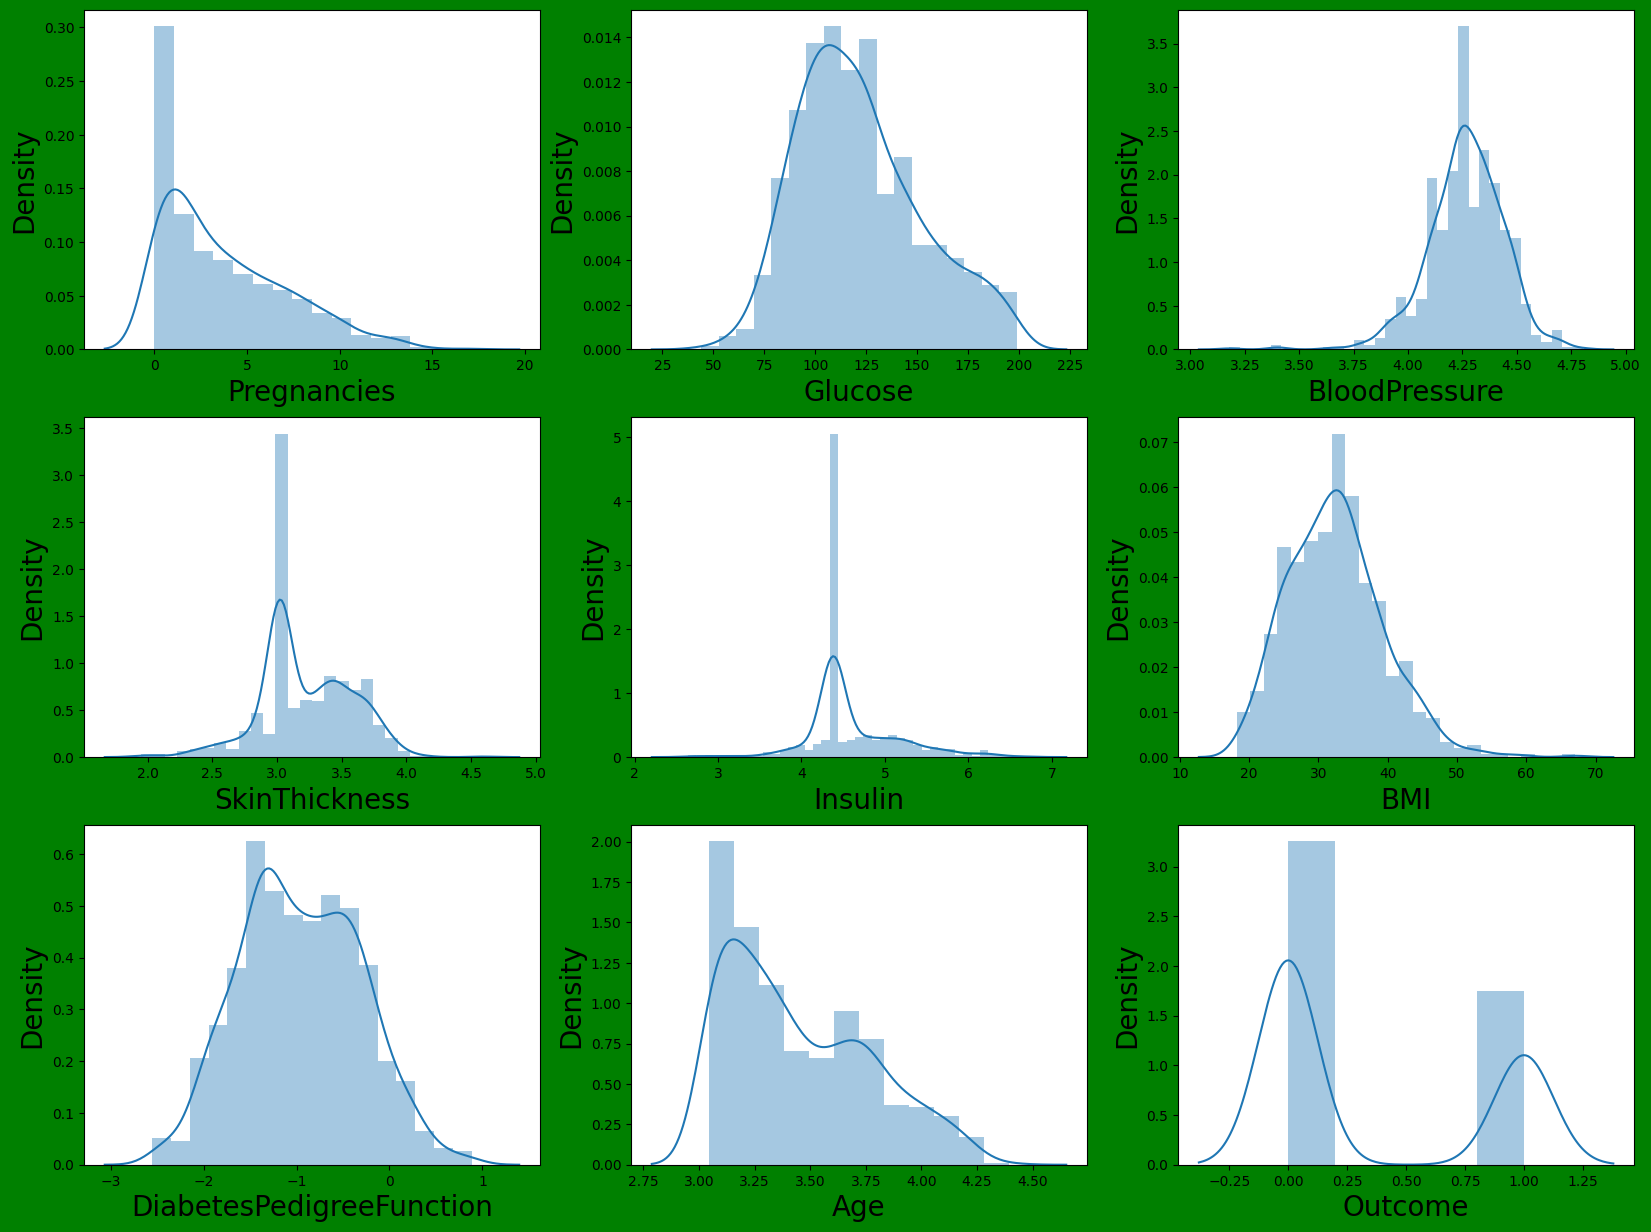

In [76]:
# Lets plot the Dist plot using plt.figure
plt.figure(figsize=(20,15),facecolor='Green') 

plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Density',fontsize=20)
        
    plotnumber +=1
    
plt.show()

When you are practicing, take any dataset and instead of applying standard scaler you can apply log tranformation and keep that in mind it can only apply on continious data.

### Power Transformer 
It is a technique used to make data more normally distributed by applying a power transformation. It stabilizes variance and helps with skewed data.

- Key Types:
1. Box-Cox Transformation: Applies to positive values and transforms data to approximate a normal distribution. It works with positive values.
2. Yeo-Johnson Transformation: Extends Box-Cox to handle both positive and negative values.
   
- How It Works:
It applies a power function to the data (e.g., square root, cube root, or logarithm) to reduce skewness and make the distribution more symmetrical.

- When to Use:
When data is skewed and you want to stabilize variance or make it more normally distributed for statistical models.

In [112]:
data = pd.read_csv(r"C:\Users\sharm\Downloads\Datasets\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
# Replacing zero values with mean of that column

data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [116]:
features = ['BMI','BloodPressure','Insulin','SkinThickness']

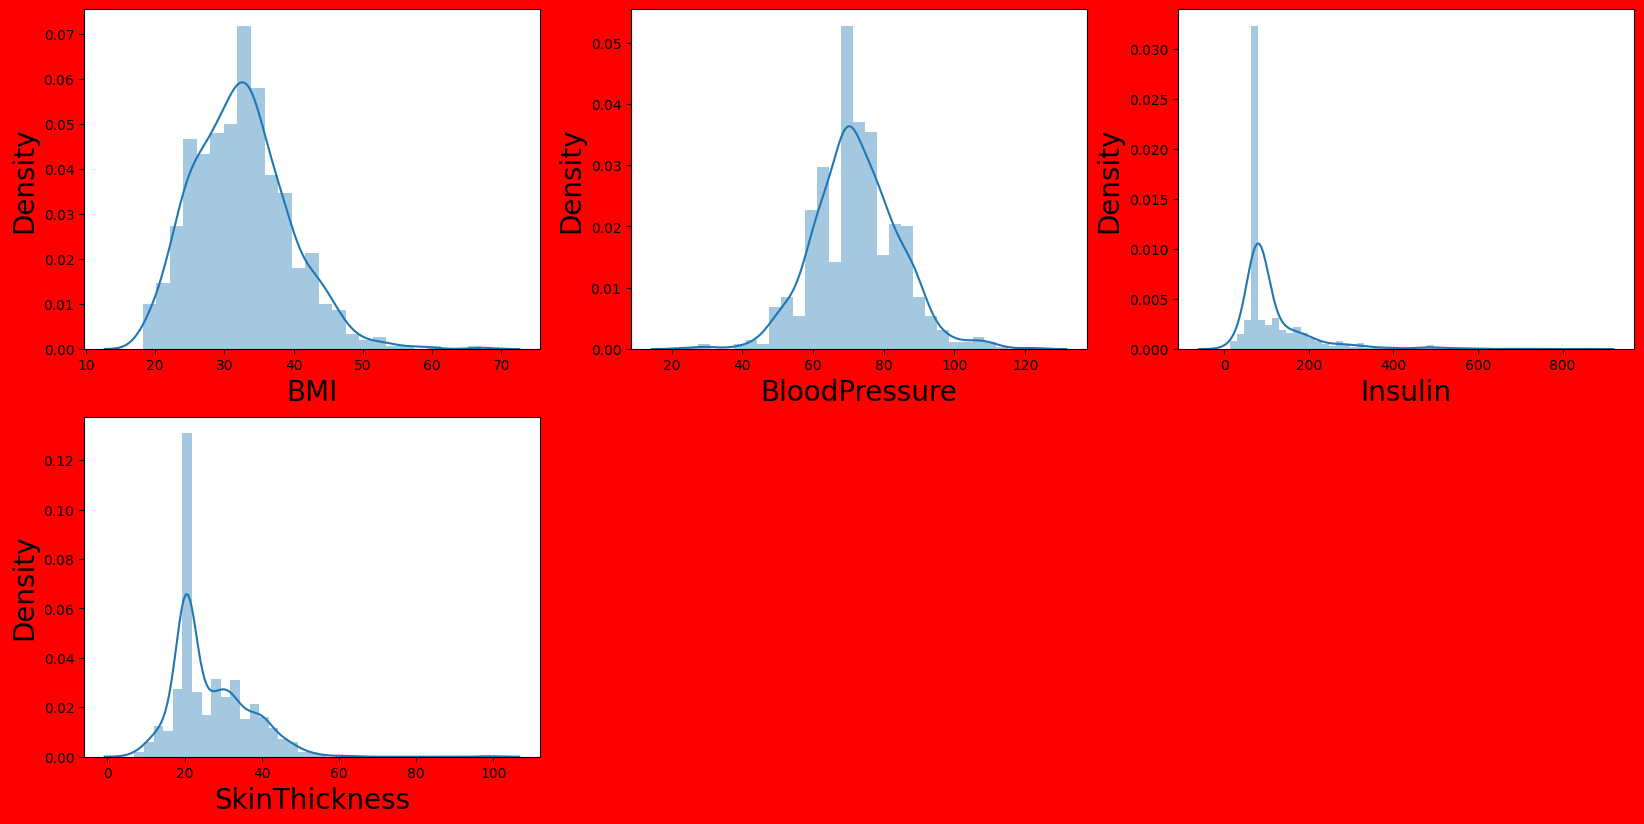

In [118]:
# Lets plot the Dist plot using plt.figure

plt.figure(figsize=(20,15),facecolor='red')

plotnumber = 1

for column in features:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Density',fontsize=20)
        
    plotnumber +=1
    
plt.show()

In [120]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='box-cox') # Works with positive values.

In [122]:
data[features] = scaler.fit_transform(data[features].values)
data[features]

,BMI,BloodPressure,Insulin,SkinThickness
0,0.261508,-0.009147,-0.350666,0.956846
1,-0.841776,-0.507220,-0.350666,0.415886
2,-1.457249,-0.674630,-0.350666,-0.567991
3,-0.584749,-0.507220,-0.025195,-0.246245
4,1.462877,-2.750267,1.006677,0.956846
...,...,...,...,...
763,0.161140,0.319657,1.117625,1.873163
764,0.697359,-0.174501,-0.350666,0.211217
765,-0.912547,-0.009147,0.305525,-0.246245
766,-0.260838,-1.011681,-0.350666,-0.567991


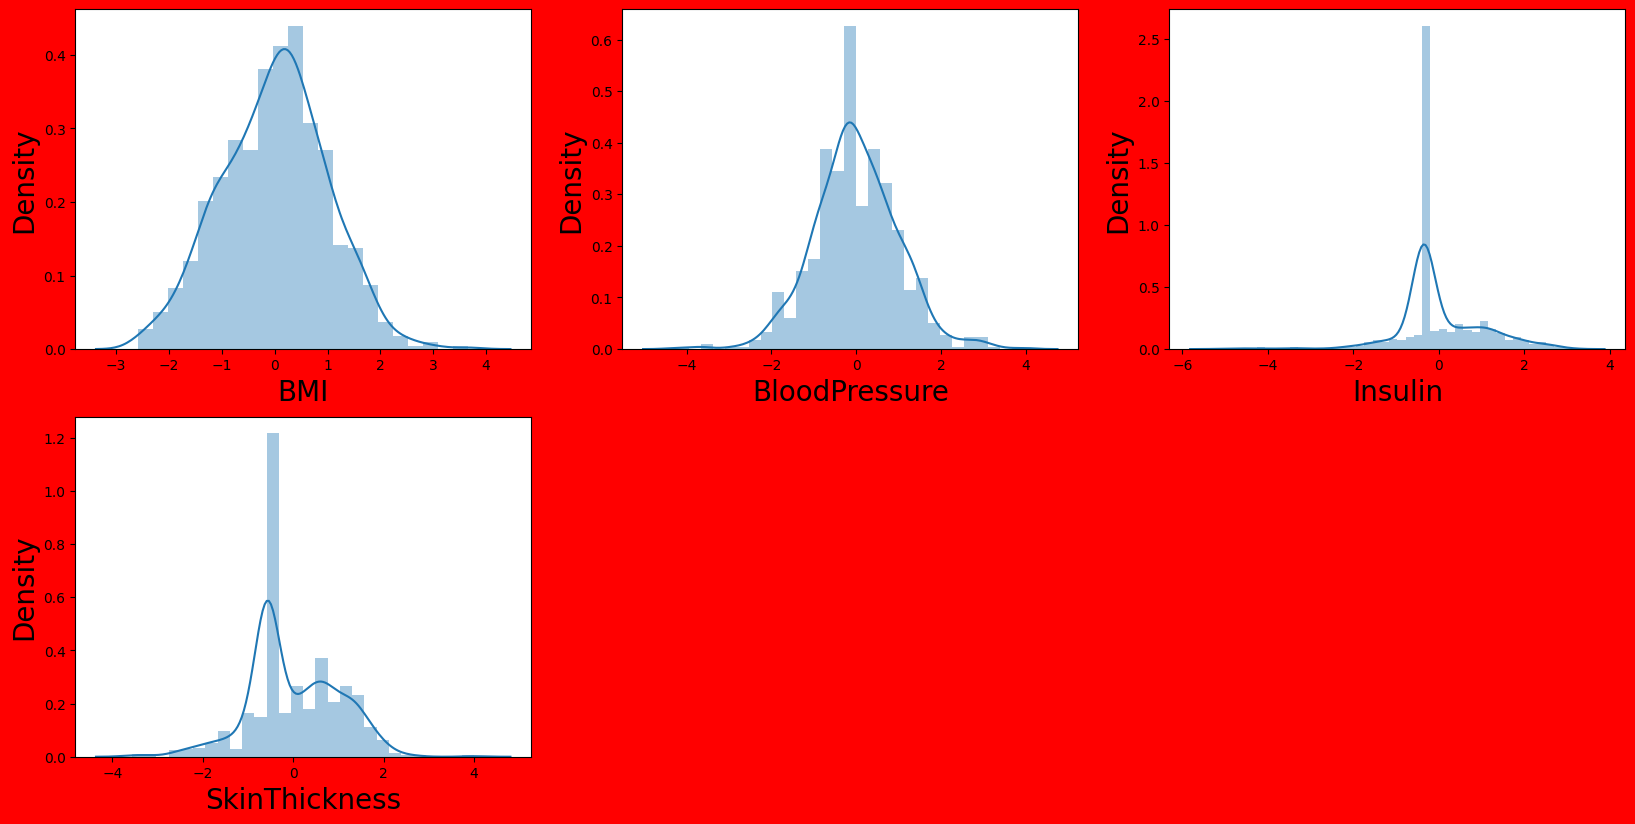

In [124]:
# Lets plot the Dist plot using plt.figure

plt.figure(figsize=(20,15),facecolor='red')

plotnumber = 1

for column in features:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Density',fontsize=20)
        
    plotnumber +=1
    
plt.show()

Post all transformation you can continue with train test split (you dont need to apply Standard Scaler on top of it).